## TECHIN 513 HW1 – Modifying Signals

Chelsey Lee

In [47]:
# import cell
from scipy.io import wavfile
from scipy.signal import resample
import scipy.signal as sig
import numpy as np
import simpleaudio as sa
import matplotlib
import matplotlib.pyplot as plt

In [36]:
pip install simpleaudio

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week hw.  You should plan on completing the first 2 assignments in the first week.

## HW 1 turn in checklist

•	your Jupyter or Colab notbooks (uploaded as .pdf with your outputs).

Note: You can work together but you need to submit your own work. do not copy paste from each other


## Assignment 1 -- Working with sound files

In [38]:
# Assignment 1 - Time Scaling Function

# Part A

# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly([float(i) for i in x], d, n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t

fs1, x1 = wavfile.read('train32.wav')
wav_obj = sa.WaveObject.from_wave_file('train32.wav')

print('Sampling rate: {} Hz'.format(fs1))

print('Shape of x1:', x1.shape)

num_channels = 1 if len(x1.shape) == 1 else x1.shape[1]
print('Number of channels:', num_channels)

length_in_samples = x1.shape[0]
print('Length in samples:', length_in_samples)

play_obj = wav_obj.play()
play_obj.wait_done()

Sampling rate: 32000 Hz
Shape of x1: (50313,)
Number of channels: 1
Length in samples: 50313


In [39]:
# Assignment 1 - Playing and Plotting Time Scaled Audio Files 

# Part B
# Downsample (fs2 = fs1 / 2)
fs2 = int(fs1 / 2)
# Simple downsampling by taking every second sample
x2 = x1[::2]  
wavfile.write('train16.wav', fs2, x2)

# Upsample (fs3 = 1.5 * fs1)
fs3 = int(1.5 * fs1)
# Upsampling by linear interpolation
x3 = np.interp(np.linspace(0, len(x1), num=int(1.5 * len(x1))), np.arange(len(x1)), x1)
wavfile.write('train48.wav', fs3, x3.astype(x1.dtype))

# Downsample to 8 kHz
fs_downsampled = 8000
downsample_factor = fs1 // fs_downsampled
x_downsampled = x1[::downsample_factor] 

# Write the downsampled file
wavfile.write('train8kHz.wav', fs_downsampled, x_downsampled)


# Part C
def play_sound(file_name):
    # Read the wav file
    fs, data = wavfile.read(file_name)
    
    # Play the sound
    play_obj = sa.play_buffer(data, 1, data.dtype.itemsize, fs)
    play_obj.wait_done()

# File names of the different versions of the train sound
files = ['train32.wav', 'train16.wav', 'train48.wav', 'train8kHz.wav']

# Read and play each file
for file in files:
    print(f"Playing {file}...")
    play_sound(file)

# Part D
# TODO: Code that solves D

Playing train32.wav...
Playing train16.wav...
Playing train48.wav...
Playing train8kHz.wav...


###  Discussion

Comment on how the audio changes when the incorrect sampling frequency is used.

Using the wrong sampling frequency for playback can noticeably change the audio's pitch and speed, affect its natural sound, and may cause distortions. While these changes might be useful for artistic effects, they are generally not preferred for accurate sound playback.

## Assignment 2 -- Amplitude Operations on Signals

In [40]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
# Start with a comment section that explains what the input variables are

fs1, x1 = wavfile.read('train32.wav')
n0 = int(0.5 * fs1)
len1 = len(x1)
s1 = np.concatenate((np.ones(n0), 0.2 * np.ones(len1 - n0)))
v1 = x1 * s1
wavfile.write('modified_train32.wav', fs1, v1.astype(x1.dtype))

In [41]:
# Assignment 2 - Title of Assignment 2

# Part B
fs1, x1 = wavfile.read('train32.wav')
len1 = len(x1)
r1 = np.linspace(1, 0, len1)
v2 = x1 * r1
wavfile.write('ramp_modified_train32.wav', fs1, v2.astype(x1.dtype))

# Part C
def play_sound(file_name):
    fs, data = wavfile.read(file_name)    
    play_obj = sa.play_buffer(data, 1, data.dtype.itemsize, fs)
    play_obj.wait_done()

files = ['train32.wav', 'modified_train32.wav', 'ramp_modified_train32.wav']

for file in files:
    print(f"Playing {file}...")
    play_sound(file)

Playing train32.wav...
Playing modified_train32.wav...
Playing ramp_modified_train32.wav...


###  Discussion

Discuss the differences that the two modifications have on the signal. What would happen if you defined s1 to take value 2 for the [0,0.5] range? If you wanted a smooth but faster decay in amplitude, what signal might you use?  
The first modification creates a sharp volume drop after 0.5 seconds, while the second gradually reduces volume to zero. If s1 is set to 2 for [0,0.5], the volume will initially double, possibly causing distortion. For a smooth but faster decay, an exponential decay signal would be more effective, reducing volume more quickly yet smoothly.

## Assignment 3 -- Time Scaling Audio Signals 

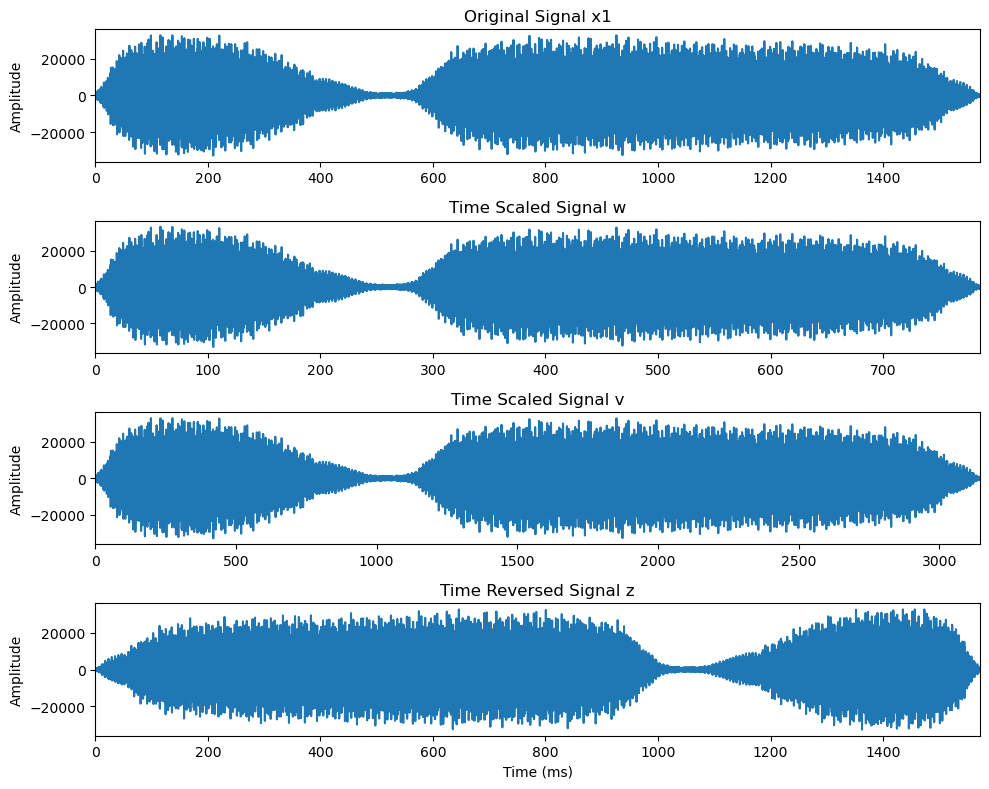

Playing Original Sound x1...
Playing Time-Scaled Sound w...
Playing Time-Scaled Sound v...
Playing Time-Reversed Sound z...


In [42]:
# Assignment 3 -- Title of assignment 3


# Part A
def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly([float(i) for i in x], d, n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t

# Part B
fs1, x1 = wavfile.read('train32.wav')

# a. Create w(t) using a=2
w, t_w = timescale(x1, fs1, 2)
# Save w to a wav file
wavfile.write('w.wav', fs1, w.astype(x1.dtype))

# b. Create v(t) using a=0.5
v, t_v = timescale(x1, fs1, 0.5)
# Save v to a wav file
wavfile.write('v.wav', fs1, v.astype(x1.dtype))

# c. Create a time-reversed version of the signal z(t)=x1(-t)
z = np.ascontiguousarray(x1[::-1])
t_z = np.arange(0, len(z), 1) * (1.0 / fs1)

# d. Save the resulting signal to a wav file
wavfile.write('time_reversed_train32.wav', fs1, z)

# Part C
# Convert time arrays to milliseconds
t_x1_ms = np.arange(0, len(x1)) * (1000.0 / fs1)
t_w_ms = t_w * 1000
t_v_ms = t_v * 1000
t_z_ms = t_z * 1000

# Create subplots
plt.figure(figsize=(10, 8))

# Plot x1
plt.subplot(4, 1, 1)
plt.plot(t_x1_ms, x1)
plt.title('Original Signal x1')
plt.ylabel('Amplitude')
plt.xlim([t_x1_ms[0], t_x1_ms[-1]])

# Plot w
plt.subplot(4, 1, 2)
plt.plot(t_w_ms, w)
plt.title('Time Scaled Signal w')
plt.ylabel('Amplitude')
plt.xlim([t_w_ms[0], t_w_ms[-1]])

# Plot v
plt.subplot(4, 1, 3)
plt.plot(t_v_ms, v)
plt.title('Time Scaled Signal v')
plt.ylabel('Amplitude')
plt.xlim([t_v_ms[0], t_v_ms[-1]])

# Plot z
plt.subplot(4, 1, 4)
plt.plot(t_z_ms, z)
plt.title('Time Reversed Signal z')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.xlim([t_z_ms[0], t_z_ms[-1]])

# Adjust layout to avoid overlap
plt.tight_layout()
# Show the plot
plt.show()

# Part D
def play_sound(file_name):
    # Read the WAV file
    fs, data = wavfile.read(file_name)
    
    # Play the sound
    play_obj = sa.play_buffer(data, 1, data.dtype.itemsize, fs)
    play_obj.wait_done()

# Play the original sound x1
print("Playing Original Sound x1...")
play_sound('train32.wav')  # Replace with the path to your original sound file

# Play the time-scaled sound w
print("Playing Time-Scaled Sound w...")
play_sound('w.wav')  # Replace with the path to your 'w' sound file

# Play the time-scaled sound v
print("Playing Time-Scaled Sound v...")
play_sound('v.wav')  # Replace with the path to your 'v' sound file

# Play the time-reversed sound z
print("Playing Time-Reversed Sound z...")
play_sound('time_reversed_train32.wav')  # Replace with the path to your 'z' sound file


###  Discussion

Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?
If a student uses the figure command before every subplot call, the script will create a new figure window for each subplot instead of arranging them in a single window. This means each plot will appear in its own separate window, leading to multiple windows with one plot each, rather than one window with all plots arranged together.

## Assignment 4 -- Time Shift Operations

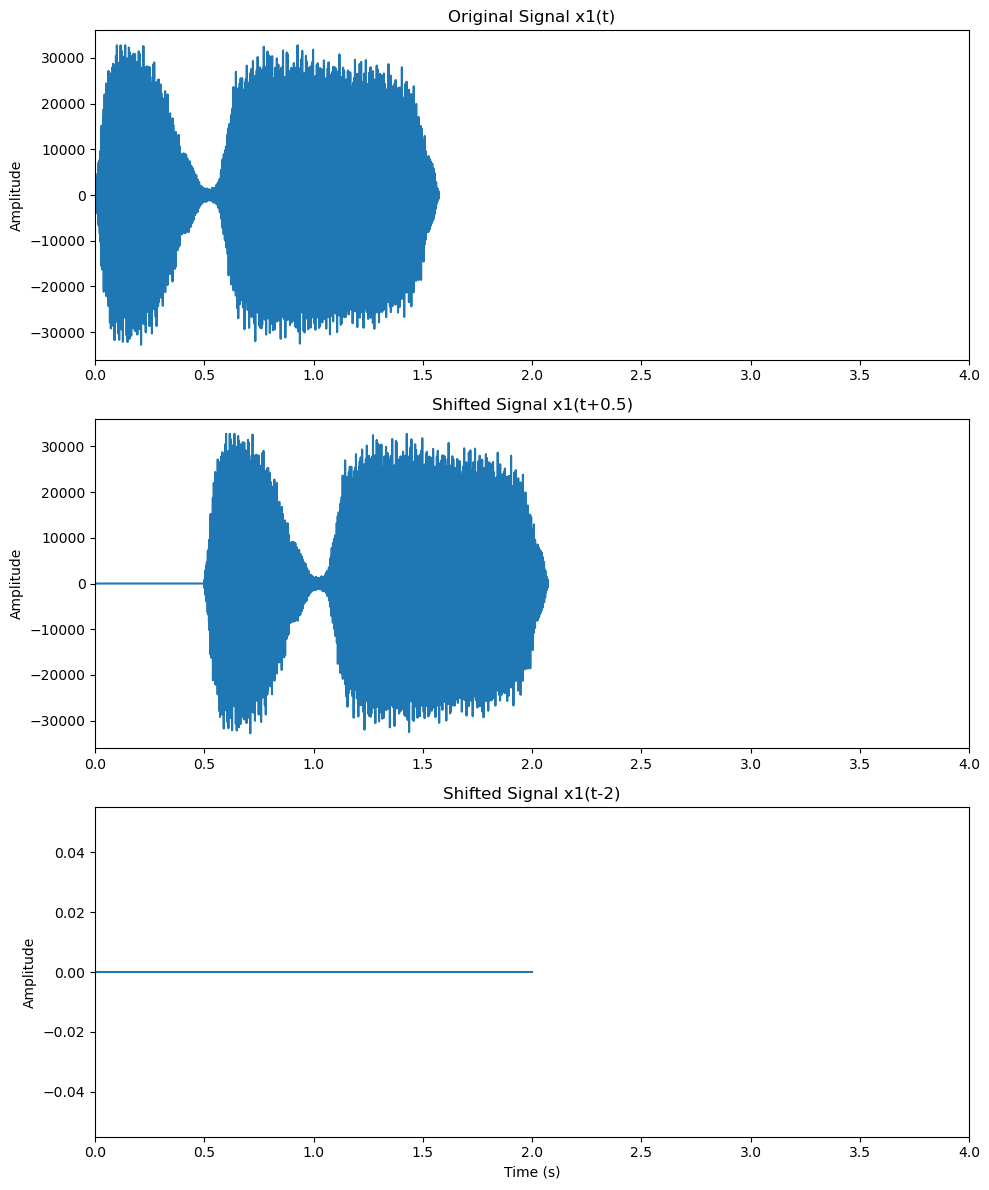

Playing Original Signal x1...
Playing Delayed Signal x1(t+0.5)...
Playing Advanced Signal x1(t-2)...


In [43]:
# Part A
def timeshift(x, fs, t0):
    n0 = int(fs * t0)

    # Time delay (positive shift)
    if t0 > 0:
        y = np.concatenate((np.zeros(n0), x))

    # Time advance (negative shift)
    elif t0 < 0:
        y = np.concatenate((x[-n0:], np.zeros(-n0)))

    # No shift
    else:
        y = x.copy()

    # Create time vector for the shifted signal
    t = np.arange(0, len(y)) / fs
    return y, t

# Part B
fs1, x1 = wavfile.read('train32.wav')

x1_delayed, t_x1_delayed = timeshift(x1, fs1, 0.5)  # x1(t+0.5)
x1_advanced, t_x1_advanced = timeshift(x1, fs1, -2)  # x1(t-2)

t_x1 = np.arange(0, len(x1)) / fs1

# Plotting
plt.figure(figsize=(10, 12))

# Plot x1(t)
plt.subplot(3, 1, 1)
plt.plot(t_x1, x1)
plt.title('Original Signal x1(t)')
plt.ylabel('Amplitude')
plt.xlim([0, 4])

# Plot x1(t+0.5)
plt.subplot(3, 1, 2)
plt.plot(t_x1_delayed, x1_delayed)
plt.title('Shifted Signal x1(t+0.5)')
plt.ylabel('Amplitude')
plt.xlim([0, 4])

# Plot x1(t-2)
plt.subplot(3, 1, 3)
plt.plot(t_x1_advanced, x1_advanced)
plt.title('Shifted Signal x1(t-2)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim([0, 4])

plt.tight_layout()
plt.show()

# Part C
def play_signal(signal, fs):
    play_obj = sa.play_buffer(signal.astype(np.int16), 1, 2, fs)
    play_obj.wait_done()

# Play the original signal
print("Playing Original Signal x1...")
play_signal(x1, fs1)

# Play the delayed signal x1(t+0.5)
print("Playing Delayed Signal x1(t+0.5)...")
play_signal(x1_delayed, fs1)

# Play the advanced signal x1(t-2)
print("Playing Advanced Signal x1(t-2)...")
play_signal(x1_advanced, fs1)

### Discussion

There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there is a better implementation.

The current implementation correctly handles the zero shift case by returning the original signal unchanged. However, for an advance larger than the signal length, it may not return a complete zero output as expected. A better implementation would explicitly check for this case and return a zero-filled array of the same length as the input signal.

## Bonus Problem: Create Your Own Sound Mash-Up

Open a new cell in the HW 1 template. Download 1-2 new sounds, which could be from the extras provided, from some open repository or from your own collection. Keep them short. If you choose a sound that has 2 channels, extract audio data from only one channel.
Using the code developed in the exercises above, create a new signal that makes use of your sounds and four signal modifications: addition, multiplication, time scaling and time shifting. You can also concatenate sounds, and if you want to insert a brief silence between sounds then just use a vector of zeroes. Remember that when you add or multiply two signals, they must be the same length. Also, be careful not to increase the amplitude too much, since it can result in clipping. For example, if you add two signals, you may want to scale the result by 0.5. Save the result as a wav file (no more than 20 sec in length) and upload to canvas with your notebook alongside with the original sounds you picked.

In [59]:
fs_bird, bird = wavfile.read('bird.wav')
if bird.ndim > 1:
    bird = bird[:,0]  # Take only one channel

fs_piccolo, piccolo = wavfile.read('piccolo11.wav')
if piccolo.ndim > 1:
    piccolo = piccolo[:,0]

# Resample piccolo to match bird's sampling rate if they are different
if fs_piccolo != fs_bird:
    piccolo = resample(piccolo, int(len(piccolo) * fs_bird / fs_piccolo))
    fs_piccolo = fs_bird

# Apply time scaling
bird_slow, _ = timescale(bird, fs_bird, 2.0)
piccolo_shifted, _ = timeshift(piccolo, fs_piccolo, -1)

# Equalize lengths for addition by padding the shorter signal with zeros
max_length = max(len(bird_slow), len(piccolo_shifted))
bird_slow = np.pad(bird_slow, (0, max_length - len(bird_slow)), 'constant')
piccolo_shifted = np.pad(piccolo_shifted, (0, max_length - len(piccolo_shifted)), 'constant')

# Add the signals (scaling down to prevent clipping)
mashup = 0.5 * (bird_slow + piccolo_shifted)

# Insert a brief silence of 1 second between sounds
silence_length = fs_bird  # 1 second of silence
silence = np.zeros(silence_length)

# Concatenate the bird and piccolo sounds with the silence in between
final_mashup = np.concatenate((mashup, silence, piccolo_shifted))

# Ensure the mashup is in the correct data type for WAV files
final_mashup = np.int16(final_mashup / np.max(np.abs(final_mashup)) * 32767)

wavfile.write('sound_mashup.wav', fs_bird, final_mashup)

def play_sound(file_name):
    fs, data = wavfile.read(file_name)
    play_obj = sa.play_buffer(data, 1, data.dtype.itemsize, fs)
    play_obj.wait_done()

print("Playing Original Bird Sound...")
play_sound('bird.wav')

print("Playing Original Piccolo Sound...")
play_sound('piccolo11.wav')

print("Playing Sound Mash-Up...")
play_sound('sound_mashup.wav')


Playing Original Bird Sound...


KeyboardInterrupt: 